#### Five fold older layer cross validation####

In [32]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from time import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import cross_validation, linear_model
from sklearn.externals import joblib
%matplotlib inline 

Automatically created module for IPython interactive environment


In [33]:
### Define RandomForest regressor
rf_cv = RandomForestClassifier(max_depth=None, n_estimators=50, max_features= 4, min_samples_split=8,min_samples_leaf = 5, bootstrap=False, criterion='gini') 

In [34]:
#######################
##For Fold 1 ##########
Tr1 = pd.read_csv('train_fold_1.csv')
X1 = Tr1[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
y1 = Tr1['Group'].values
Te1 = pd.read_csv('test_fold_1.csv')
Xt1 = Te1[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
yt1 = Te1['Group'].values

In [35]:
##### For Fold 1 ####
RF1 = rf_cv.fit(X1, y1) #model fitting
prob1 = RF1.predict_proba(Xt1) #Prob 1 is the prob score for sample (1-18) + (1-10)
prob1

array([[ 0.77268254,  0.22731746],
       [ 0.83390476,  0.16609524],
       [ 0.76850794,  0.23149206],
       [ 0.93300794,  0.06699206],
       [ 0.86119048,  0.13880952],
       [ 0.72997619,  0.27002381],
       [ 0.87552381,  0.12447619],
       [ 0.85835714,  0.14164286],
       [ 0.82164286,  0.17835714],
       [ 0.73360317,  0.26639683],
       [ 0.80420635,  0.19579365],
       [ 0.84443651,  0.15556349],
       [ 0.83176984,  0.16823016],
       [ 0.74355556,  0.25644444],
       [ 0.76080952,  0.23919048],
       [ 0.82988889,  0.17011111],
       [ 0.69043651,  0.30956349],
       [ 0.59757937,  0.40242063],
       [ 0.35733333,  0.64266667],
       [ 0.20685714,  0.79314286],
       [ 0.42296825,  0.57703175],
       [ 0.78168254,  0.21831746],
       [ 0.29270635,  0.70729365],
       [ 0.2247619 ,  0.7752381 ],
       [ 0.29042063,  0.70957937],
       [ 0.46524603,  0.53475397],
       [ 0.65352381,  0.34647619],
       [ 0.59824603,  0.40175397]])

In [36]:
####################
##For Fold 2########
Tr2 = pd.read_csv('train_fold_2.csv')
X2 = Tr2[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
y2 = Tr2['Group'].values
Te2 = pd.read_csv('test_fold_2.csv')
Xt2 = Te2[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
yt2 = Te2['Group'].values

In [37]:
##For Fold 2####
RF2 = rf_cv.fit(X2, y2) #model fitting
prob2 = RF2.predict_proba(Xt2) 

In [38]:
#################
##For Fold 3 #####
Tr3 = pd.read_csv('train_fold_3.csv')
X3 = Tr3[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
y3 = Tr3['Group'].values
Te3 = pd.read_csv('test_fold_3.csv')
Xt3 = Te3[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
yt3 = Te3['Group'].values

RF3 = rf_cv.fit(X3, y3) #model fitting
prob3 = RF3.predict_proba(Xt3)


In [39]:
################
##For Fold 4 ####
Tr4 = pd.read_csv('train_fold_4.csv')
X4 = Tr4[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
y4 = Tr4['Group'].values
Te4 = pd.read_csv('test_fold_4.csv')
Xt4 = Te4[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
yt4 = Te4['Group'].values

RF4 = rf_cv.fit(X4, y4) #model fitting
prob4 = RF4.predict_proba(Xt4)

In [40]:
################
##For Fold 5 ####
Tr5 = pd.read_csv('train_fold_5.csv')
X5 = Tr5[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
y5 = Tr5['Group'].values
Te5 = pd.read_csv('test_fold_5.csv')
Xt5 = Te5[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
yt5 = Te5['Group'].values

RF5 = rf_cv.fit(X5, y5) #model fitting
prob5 = RF5.predict_proba(Xt5)

In [41]:
RF5.predict(Xt5)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [42]:
prob_all = np.concatenate((prob1, prob2, prob3, prob4, prob5), axis=0)
print prob_all[:,0]

[ 0.77268254  0.83390476  0.76850794  0.93300794  0.86119048  0.72997619
  0.87552381  0.85835714  0.82164286  0.73360317  0.80420635  0.84443651
  0.83176984  0.74355556  0.76080952  0.82988889  0.69043651  0.59757937
  0.35733333  0.20685714  0.42296825  0.78168254  0.29270635  0.2247619
  0.29042063  0.46524603  0.65352381  0.59824603  0.73724603  0.66895238
  0.74981746  0.6885873   0.47073016  0.971       0.79405556  0.86738095
  0.32444444  0.33124603  0.67694444  0.74684127  0.50606349  0.86821429
  0.84538095  0.8407619   0.81746032  0.74580159  0.93193651  0.33581746
  0.23778571  0.10827778  0.20671429  0.23112698  0.35764286  0.09881746
  0.82961111  0.61646825  0.23927778  0.63035714  0.36883333  0.84731746
  0.89334921  0.84965079  0.57284127  0.9662619   0.60692063  0.65157143
  0.89503968  0.7739127   0.20295238  0.93807143  0.87700794  0.60984127
  0.64863492  0.70116667  0.95573016  0.78206349  0.35275397  0.23649206
  0.80542063  0.78811905  0.95006349  0.50014286  0.

In [43]:
y_all = np.concatenate((yt1, yt2, yt3, yt4, yt5), axis=0)
print y_all

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


In [44]:
### For cutoff = 0.5
cutoff5_l = []
for x in np.nditer(prob_all[:,0]):
    if x > 0.5:
        z = 0
    else:
        z = 1
    cutoff5_l.append(z)
cutoff5 = np.asarray(cutoff5_l)
print cutoff5  

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0]


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_all, cutoff5)

array([[79,  9],
       [18, 35]])

In [46]:
acc5 = (y_all == cutoff5)
print np.mean(acc5)

0.808510638298


In [47]:
### For cutoff = 0.6
cutoff6_l = []
for x in np.nditer(prob_all[:,0]):
    if x > 0.6:
        z = 0
    else:
        z = 1
    cutoff6_l.append(z)
cutoff6 = np.asarray(cutoff6_l)
print cutoff6

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1
 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0]


In [48]:
confusion_matrix(y_all, cutoff6)
#acc6 = (y_all == cutoff6)
#print np.mean(acc6) 0.808510638298

array([[73, 15],
       [13, 40]])

In [49]:
### For cutoff = 0.7
cutoff7_l = []
for x in np.nditer(prob_all[:,0]):
    if x > 0.7:
        z = 0
    else:
        z = 1
    cutoff7_l.append(z)
cutoff7 = np.asarray(cutoff7_l)
print cutoff7

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1]


In [50]:
confusion_matrix(y_all, cutoff7)
#acc7 = (y_all == cutoff7)
#print np.mean(acc7) 0.780141843972

array([[62, 26],
       [ 7, 46]])

In [51]:
### For cutoff = 0.8
cutoff8_l = []
for x in np.nditer(prob_all[:,0]):
    if x > 0.8:
        z = 0
    else:
        z = 1
    cutoff8_l.append(z)
cutoff8 = np.asarray(cutoff8_l)
confusion_matrix(y_all, cutoff8)
acc8 = (y_all == cutoff8)
print np.mean(acc8) 0.595744680851

SyntaxError: invalid syntax (<ipython-input-51-1a031c109de7>, line 12)

In [52]:
### For cutoff = 0.9
cutoff9_l = []
for x in np.nditer(prob_all[:,0]):
    if x > 0.9:
        z = 0
    else:
        z = 1
    cutoff9_l.append(z)
cutoff9 = np.asarray(cutoff9_l)
confusion_matrix(y_all, cutoff9)
#acc9 = (y_all == cutoff9)
#print np.mean(acc9)  0.41134751773

array([[ 7, 81],
       [ 2, 51]])

In [53]:
##### Build ROC curve for the whole dataset #####
#################################################
from sklearn.metrics import roc_curve, auc  ##Make roc curve ##  ##new##
from sklearn.metrics import roc_auc_score ##roc auc##

In [55]:
#ROC curve for 0.5 cutoff
fpr, tpr, thresholds = roc_curve(y_all, cutoff5)
roc_auc_score = roc_auc_score(y_all,cutoff5)

Populating the interactive namespace from numpy and matplotlib


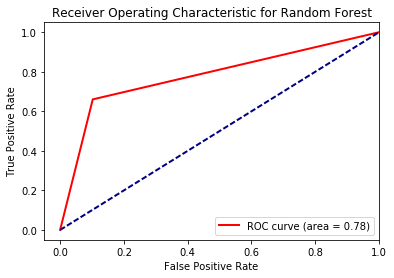

In [91]:
%pylab inline
%matplotlib inline 
#pylab.rcParams['figure.figsize'] = (6, 4)
#label_size = 20

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()